In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# ast module for abstract syntax grammar
from ast import literal_eval
import ast

import scipy
import datetime

# language processing
import nltk
from rake_nltk import Rake
from nltk.corpus import stopwords 

# wordcloud
from wordcloud import WordCloud

stopwords = set(stopwords.words('english'))

%matplotlib inline


In [177]:
# md = The Movies Dataset
# ml = MovieLens 100k Dataset
# sc = self-scraped using OMDBAPI

# The Movies Dataset 
md_movies = pd.read_csv('/Users/user/Downloads/the-movies-dataset/movies_metadata.csv')
md_plots = pd.read_csv('/Users/user/Downloads/the-movies-dataset/keywords.csv')
md_sm_rate = pd.read_csv('/Users/user/Downloads/the-movies-dataset/ratings_small.csv')
md_ratings = pd.read_csv('/Users/user/Downloads/the-movies-dataset/ratings.csv')

# The MovieLens 100k Dataset

# Reading file with user demographics:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
ml_demo = pd.read_csv('/Users/user/Downloads/ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')

# Reading the file with the ratings
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ml_data = pd.read_csv('/Users/user/Downloads/ml-100k/u.data', sep='\t', names=r_cols,encoding='latin-1')

#Reading items file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

ml_movies = pd.read_csv('/Users/user/Downloads/ml-100k/u.item', sep='|', names=i_cols,
encoding='latin-1')


# Self scraped movie data using OMDBAPI
sc_data = pd.read_csv('/Users/user/final-capstone/inprogress3.csv')



datasets = [md_movies, md_plots, md_sm_rate, md_ratings, 
           ml_data, ml_movies, ml_demo, sc_data]

/Users/user/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/user/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (1,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [178]:
for df in datasets:
    print(df.shape)
    df.head()

(45466, 24)
(46419, 2)
(100004, 4)
(26024289, 4)
(100000, 4)
(1682, 24)
(943, 5)
(284303, 25)


# Cleaning - The Movies Dataset

In [179]:
md_movies = pd.read_csv('/Users/user/Downloads/the-movies-dataset/movies_metadata.csv')

In [180]:
md_movies.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [181]:
# md_movies, md_plots, md_sm_rate, md_ratings
cols = ['title','original_language','belongs_to_collection','release_date','runtime','tagline','budget','revenue',
        'poster_path','genres','production_countries','production_companies','overview','vote_average',
        'vote_count','imdb_id','poster_path','id']
md_movies = md_movies[cols]

md_movies.head()

,title,original_language,belongs_to_collection,release_date,runtime,tagline,budget,revenue,poster_path,genres,production_countries,production_companies,overview,vote_average,vote_count,imdb_id,poster_path,id
0,Toy Story,en,"{'id': 10194, 'name': 'Toy Story Collection', ...",1995-10-30,81.0,NaN,30000000,373554033.0,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Pixar Animation Studios', 'id': 3}]","Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,862
1,Jumanji,en,NaN,1995-12-15,104.0,Roll the dice and unleash the excitement!,65000000,262797249.0,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",When siblings Judy and Peter discover an encha...,6.9,2413.0,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,8844
2,Grumpier Old Men,en,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",1995-12-22,101.0,Still Yelling. Still Fighting. Still Ready for...,0,0.0,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",A family wedding reignites the ancient feud be...,6.5,92.0,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,15602
3,Waiting to Exhale,en,NaN,1995-12-22,127.0,Friends are the people who let you be yourself...,16000000,81452156.0,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",[{'name': 'Twentieth Century Fox Film Corporat...,"Cheated on, mistreated and stepped on, the wom...",6.1,34.0,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,31357
4,Father of the Bride Part II,en,"{'id': 96871, 'name': 'Father of the Bride Col...",1995-02-10,106.0,Just When His World Is Back To Normal... He's ...,0,76578911.0,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'id': 35, 'name': 'Comedy'}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Sandollar Productions', 'id': 5842}...",Just when George Banks has recovered from his ...,5.7,173.0,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg,11862


In [182]:
# Convert the 'id' column in both dataframes to numeric
md_movies['id'] =pd.to_numeric(md_movies['id'], errors='coerce', downcast="integer")
md_plots['id'] = pd.to_numeric(md_plots['id'], errors='coerce', downcast="integer")


# Drop null values
md_movies.dropna(subset=["id"],inplace=True)
md_plots.dropna(subset=["id"],inplace=True)


# Merge md_movies and md_plots into md_movies
md_movies = md_movies.merge(md_plots,on=["id"],how="left")

In [183]:
md_movies.shape

(46483, 19)

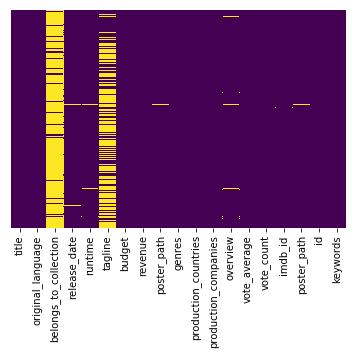

In [184]:
# Check null values

sns.heatmap(md_movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [185]:
# more cleaning

md_movies.dropna(subset=['runtime','overview'], inplace=True)
print(md_movies.shape)

md_movies['budget'] = pd.to_numeric(md_movies['budget'], errors='coerce')
md_movies['budget'] = md_movies['budget'].replace(0,np.nan)

md_movies['revenue'] = md_movies['revenue'].replace(0, np.nan)

(45484, 19)


#### Add form of weighted average (IMDB)

* modified the original formula as we don't care if a movie has 0 ratings, add some noise/lambda 0

Weighted rating using IMDb's equation for a true Bayesian estimate: 

$$ (WR) = (vv+m.R) + (mv+m.C)(vv+m.R)+(mv+m.C) $$ 

where:

v = the number of votes for the movie  
m = the minimum votes required to be listed in the database  
R = the average rating of the movie  
C = the mean vote across the whole report  

In [186]:
vote_counts = md_movies[md_movies['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = md_movies[md_movies['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()

m = vote_counts.quantile(0.75)

def weighted_rating(x):
    v = x['vote_count']+1 # added +1 - Dan
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

md_movies['weighted_rating'] = md_movies.apply(weighted_rating, axis=1)

Text(0, 0.5, 'Weighted Rating')

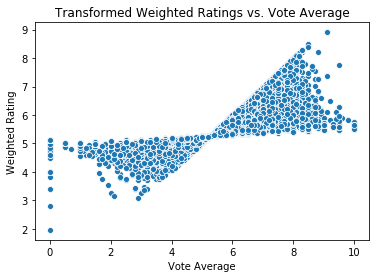

In [187]:
# plot the difference

sns.scatterplot(x='vote_average', y='weighted_rating',data=md_movies)
plt.title('Transformed Weighted Ratings vs. Vote Average')
plt.xlabel('Vote Average')
plt.ylabel('Weighted Rating')

In [188]:
md_movies.head()

,title,original_language,belongs_to_collection,release_date,runtime,tagline,budget,revenue,poster_path,genres,production_countries,production_companies,overview,vote_average,vote_count,imdb_id,poster_path,id,keywords,weighted_rating
0,Toy Story,en,"{'id': 10194, 'name': 'Toy Story Collection', ...",1995-10-30,81.0,NaN,30000000.0,373554033.0,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Pixar Animation Studios', 'id': 3}]","Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,862.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",7.684314
1,Jumanji,en,NaN,1995-12-15,104.0,Roll the dice and unleash the excitement!,65000000.0,262797249.0,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",When siblings Judy and Peter discover an encha...,6.9,2413.0,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,8844.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",6.876519
2,Grumpier Old Men,en,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",1995-12-22,101.0,Still Yelling. Still Fighting. Still Ready for...,NaN,NaN,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",A family wedding reignites the ancient feud be...,6.5,92.0,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,15602.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",6.160121
3,Waiting to Exhale,en,NaN,1995-12-22,127.0,Friends are the people who let you be yourself...,16000000.0,81452156.0,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",[{'name': 'Twentieth Century Fox Film Corporat...,"Cheated on, mistreated and stepped on, the wom...",6.1,34.0,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,31357.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...",5.678507
4,Father of the Bride Part II,en,"{'id': 96871, 'name': 'Father of the Bride Col...",1995-02-10,106.0,Just When His World Is Back To Normal... He's ...,NaN,76578911.0,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'id': 35, 'name': 'Comedy'}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Sandollar Productions', 'id': 5842}...",Just when George Banks has recovered from his ...,5.7,173.0,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg,11862.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",5.625816


#### Genres

* Genres are read as list/dict as type, parse into list and drop the 'ids'

In [189]:
md_movies.head()

,title,original_language,belongs_to_collection,release_date,runtime,tagline,budget,revenue,poster_path,genres,production_countries,production_companies,overview,vote_average,vote_count,imdb_id,poster_path,id,keywords,weighted_rating
0,Toy Story,en,"{'id': 10194, 'name': 'Toy Story Collection', ...",1995-10-30,81.0,NaN,30000000.0,373554033.0,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Pixar Animation Studios', 'id': 3}]","Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,tt0114709,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,862.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",7.684314
1,Jumanji,en,NaN,1995-12-15,104.0,Roll the dice and unleash the excitement!,65000000.0,262797249.0,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'TriStar Pictures', 'id': 559}, {'na...",When siblings Judy and Peter discover an encha...,6.9,2413.0,tt0113497,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,8844.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...",6.876519
2,Grumpier Old Men,en,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",1995-12-22,101.0,Still Yelling. Still Fighting. Still Ready for...,NaN,NaN,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",A family wedding reignites the ancient feud be...,6.5,92.0,tt0113228,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,15602.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",6.160121
3,Waiting to Exhale,en,NaN,1995-12-22,127.0,Friends are the people who let you be yourself...,16000000.0,81452156.0,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",[{'name': 'Twentieth Century Fox Film Corporat...,"Cheated on, mistreated and stepped on, the wom...",6.1,34.0,tt0114885,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,31357.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...",5.678507
4,Father of the Bride Part II,en,"{'id': 96871, 'name': 'Father of the Bride Col...",1995-02-10,106.0,Just When His World Is Back To Normal... He's ...,NaN,76578911.0,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'id': 35, 'name': 'Comedy'}]","[{'iso_3166_1': 'US', 'name': 'United States o...","[{'name': 'Sandollar Productions', 'id': 5842}...",Just when George Banks has recovered from his ...,5.7,173.0,tt0113041,/e64sOI48hQXyru7naBFyssKFxVd.jpg,11862.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",5.625816


In [190]:
# Genres
md_movies['genres'] = md_movies['genres'].fillna('[]').apply(literal_eval).apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Production companies
md_movies['production_countries'] = md_movies['production_countries'].fillna('[]').apply(ast.literal_eval)
md_movies['production_countries'] = md_movies['production_countries'].apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

# Belongs to collection
md_movies['belongs_to_collection'] = md_movies['belongs_to_collection'].fillna("[]").apply(ast.literal_eval).apply(
    lambda x: x['name'] if isinstance(x, dict) else np.nan)

# Keywords
md_movies['keywords'] = md_movies['keywords'].fillna('[]').apply(literal_eval).apply(
    lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [191]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
md_movies['poster_path'] = "<img src='" + base_poster_url + md_movies['poster_path'] + "' style='height:100px;'>"

In [192]:
md_movies.head()

,title,original_language,belongs_to_collection,release_date,runtime,tagline,budget,revenue,poster_path,genres,production_countries,production_companies,overview,vote_average,vote_count,imdb_id,poster_path,id,keywords,weighted_rating
0,Toy Story,en,Toy Story Collection,1995-10-30,81.0,NaN,30000000.0,373554033.0,<img src='http://image.tmdb.org/t/p/w185//rhIR...,"[Animation, Comedy, Family]",[United States of America],"[{'name': 'Pixar Animation Studios', 'id': 3}]","Led by Woody, Andy's toys live happily in his ...",7.7,5415.0,tt0114709,<img src='http://image.tmdb.org/t/p/w185//rhIR...,862.0,"[jealousy, toy, boy, friendship, friends, riva...",7.684314
1,Jumanji,en,NaN,1995-12-15,104.0,Roll the dice and unleash the excitement!,65000000.0,262797249.0,<img src='http://image.tmdb.org/t/p/w185//vzmL...,"[Adventure, Fantasy, Family]",[United States of America],"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",When siblings Judy and Peter discover an encha...,6.9,2413.0,tt0113497,<img src='http://image.tmdb.org/t/p/w185//vzmL...,8844.0,"[board game, disappearance, based on children'...",6.876519
2,Grumpier Old Men,en,Grumpy Old Men Collection,1995-12-22,101.0,Still Yelling. Still Fighting. Still Ready for...,NaN,NaN,<img src='http://image.tmdb.org/t/p/w185//6ksm...,"[Romance, Comedy]",[United States of America],"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",A family wedding reignites the ancient feud be...,6.5,92.0,tt0113228,<img src='http://image.tmdb.org/t/p/w185//6ksm...,15602.0,"[fishing, best friend, duringcreditsstinger, o...",6.160121
3,Waiting to Exhale,en,NaN,1995-12-22,127.0,Friends are the people who let you be yourself...,16000000.0,81452156.0,<img src='http://image.tmdb.org/t/p/w185//16XO...,"[Comedy, Drama, Romance]",[United States of America],[{'name': 'Twentieth Century Fox Film Corporat...,"Cheated on, mistreated and stepped on, the wom...",6.1,34.0,tt0114885,<img src='http://image.tmdb.org/t/p/w185//16XO...,31357.0,"[based on novel, interracial relationship, sin...",5.678507
4,Father of the Bride Part II,en,Father of the Bride Collection,1995-02-10,106.0,Just When His World Is Back To Normal... He's ...,NaN,76578911.0,<img src='http://image.tmdb.org/t/p/w185//e64s...,[Comedy],[United States of America],"[{'name': 'Sandollar Productions', 'id': 5842}...",Just when George Banks has recovered from his ...,5.7,173.0,tt0113041,<img src='http://image.tmdb.org/t/p/w185//e64s...,11862.0,"[baby, midlife crisis, confidence, aging, daug...",5.625816


In [193]:
md_movies.columns

Index(['title', 'original_language', 'belongs_to_collection', 'release_date',
       'runtime', 'tagline', 'budget', 'revenue', 'poster_path', 'genres',
       'production_countries', 'production_companies', 'overview',
       'vote_average', 'vote_count', 'imdb_id', 'poster_path', 'id',
       'keywords', 'weighted_rating'],
      dtype='object')

In [194]:
final_cols = ['title','original_language','belongs_to_collection','release_date','runtime','tagline','budget','revenue','genres',
             'production_countries','overview','imdb_id','id','keywords','weighted_rating', 'poster_path']

md_movies = md_movies[final_cols]

In [195]:
# md_movies.to_csv('movies-dataset-cleaning-complete-jun6.csv')

In [219]:
md_movies.columns

Index(['title', 'original_language', 'belongs_to_collection', 'release_date',
       'runtime', 'tagline', 'budget', 'revenue', 'genres',
       'production_countries', 'overview', 'imdb_id', 'id', 'keywords',
       'weighted_rating', 'poster_path', 'poster_path', 'return', 'year',
       'day', 'month'],
      dtype='object')

In [197]:
print(md_movies['overview'][50])
print(md_movies['tagline'][50])

Detective - turned - bodyguard Cynthia McKay (Cynthia Rothrock) is hired by a psychotic icy seductress, Nina Lindell (Lydie Denier), the same woman who killed Mckay's lover months earlier.  With vendetta in her heart McKay accompanies the flamboyantly playful womanizer through the glamourous world of the super-rich as his protector.  In a unique role reversal, it is the woman protecting the man from another woman, erupting into a deadly triangle of passion, suspense and action.
She's no angel of mercy.


#### Final Columns for the Movies Dataset:

* **Title** - Refers to the title of the film (in English). 
* **Original Language** - The original language of the film
* **Belongs to collection** - if the movie is part of a franchise, which franchise
* **Release date** - The release date
* **Runtime** - Movie Runtime
* **Tagline** - A quick tagline
* **Budget** - The budget of the film
* **Revenue** - What the film made
* **Genres** - Which genres the film falls into
* **Production countries** - countries in which the film was produced
* **Overview** - a quick plot synopsis, sometimes the same and sometimes different from the 'tagline'
* **IMDb ID** - The ID of the movie on the website IMDB
* **ID** - the movie ID in the dataset, necessary for ratings info
* **Keywords** - keywords pulled from movie synopsis
* **Weighted rating** - a transformed rating using the imdb rating by users and the number of ratings using true Bayesian estimate:
    * $(𝑊𝑅)=(𝑣𝑣+𝑚.𝑅)+(𝑚𝑣+𝑚.𝐶)(𝑣𝑣+𝑚.𝑅)+(𝑚𝑣+𝑚.𝐶)$
* **Poster path** - the path to the poster for images
* **Return** - How much the movie made compared to its budget
* **Year** - The year of release
* **Month** - The Month the movie was released


In [198]:
md_movies.head()

,title,original_language,belongs_to_collection,release_date,runtime,tagline,budget,revenue,genres,production_countries,overview,imdb_id,id,keywords,weighted_rating,poster_path,poster_path
0,Toy Story,en,Toy Story Collection,1995-10-30,81.0,NaN,30000000.0,373554033.0,"[Animation, Comedy, Family]",[United States of America],"Led by Woody, Andy's toys live happily in his ...",tt0114709,862.0,"[jealousy, toy, boy, friendship, friends, riva...",7.684314,<img src='http://image.tmdb.org/t/p/w185//rhIR...,<img src='http://image.tmdb.org/t/p/w185//rhIR...
1,Jumanji,en,NaN,1995-12-15,104.0,Roll the dice and unleash the excitement!,65000000.0,262797249.0,"[Adventure, Fantasy, Family]",[United States of America],When siblings Judy and Peter discover an encha...,tt0113497,8844.0,"[board game, disappearance, based on children'...",6.876519,<img src='http://image.tmdb.org/t/p/w185//vzmL...,<img src='http://image.tmdb.org/t/p/w185//vzmL...
2,Grumpier Old Men,en,Grumpy Old Men Collection,1995-12-22,101.0,Still Yelling. Still Fighting. Still Ready for...,NaN,NaN,"[Romance, Comedy]",[United States of America],A family wedding reignites the ancient feud be...,tt0113228,15602.0,"[fishing, best friend, duringcreditsstinger, o...",6.160121,<img src='http://image.tmdb.org/t/p/w185//6ksm...,<img src='http://image.tmdb.org/t/p/w185//6ksm...
3,Waiting to Exhale,en,NaN,1995-12-22,127.0,Friends are the people who let you be yourself...,16000000.0,81452156.0,"[Comedy, Drama, Romance]",[United States of America],"Cheated on, mistreated and stepped on, the wom...",tt0114885,31357.0,"[based on novel, interracial relationship, sin...",5.678507,<img src='http://image.tmdb.org/t/p/w185//16XO...,<img src='http://image.tmdb.org/t/p/w185//16XO...
4,Father of the Bride Part II,en,Father of the Bride Collection,1995-02-10,106.0,Just When His World Is Back To Normal... He's ...,NaN,76578911.0,[Comedy],[United States of America],Just when George Banks has recovered from his ...,tt0113041,11862.0,"[baby, midlife crisis, confidence, aging, daug...",5.625816,<img src='http://image.tmdb.org/t/p/w185//e64s...,<img src='http://image.tmdb.org/t/p/w185//e64s...


#### A little more feature engineering

In [199]:
md_movies.dtypes

title                     object
original_language         object
belongs_to_collection     object
release_date              object
runtime                  float64
tagline                   object
budget                   float64
revenue                  float64
genres                    object
production_countries      object
overview                  object
imdb_id                   object
id                       float64
keywords                  object
weighted_rating          float64
poster_path               object
poster_path               object
dtype: object

In [200]:
# Generate the 'return' on the movie based on budget and what the movie made

md_movies['return'] = md_movies['revenue'] / md_movies['budget']
md_movies[md_movies['return'].isnull()].shape

(40061, 18)

In [201]:
md_movies['return'].isnull().value_counts()

True     40061
False     5423
Name: return, dtype: int64

#### Dates and year

In [202]:
md_movies['year'] = pd.to_datetime(md_movies['release_date'], errors='coerce').apply(
    lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [203]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [204]:
def get_month(x):
    try:
        return month_order[int(str(x).split('-')[1]) - 1]
    except:
        return np.nan

In [205]:
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

In [206]:
# md_movies['day'] = md_movies['release_date'].apply(get_day)
md_movies['month'] = md_movies['release_date'].apply(get_month)

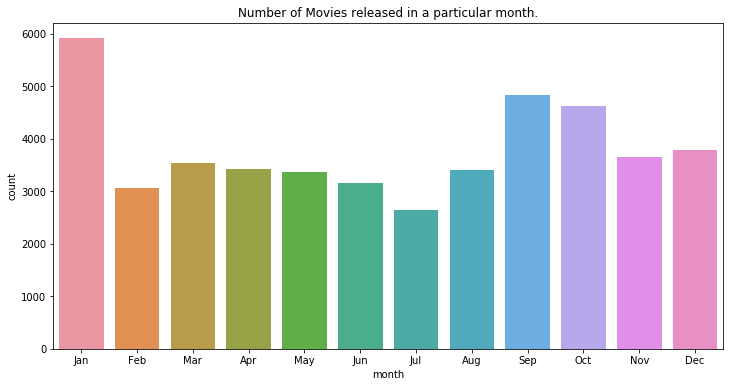

In [207]:
plt.figure(figsize=(12,6))
plt.title("Number of Movies released in a particular month.")
sns.countplot(x='month', data=md_movies, order=month_order)

Text(0.5, 0, 'month')

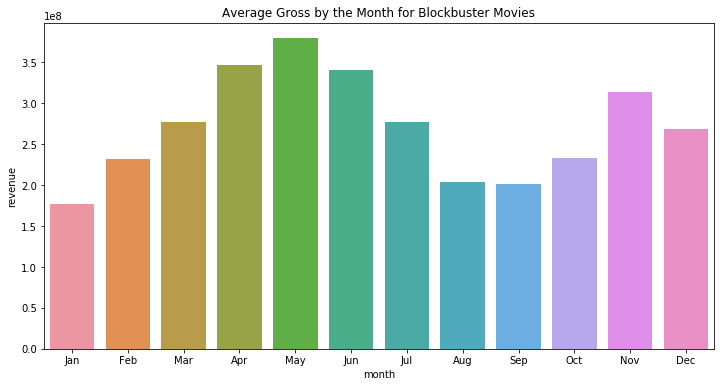

In [208]:
month_mean = pd.DataFrame(md_movies[md_movies['revenue'] > 1e8].groupby('month')['revenue'].mean())
month_mean['mon'] = month_mean.index
plt.figure(figsize=(12,6))
plt.title("Average Gross by the Month for Blockbuster Movies")
sns.barplot(x='mon', y='revenue', data=month_mean, order=month_order)
plt.xlabel('month')

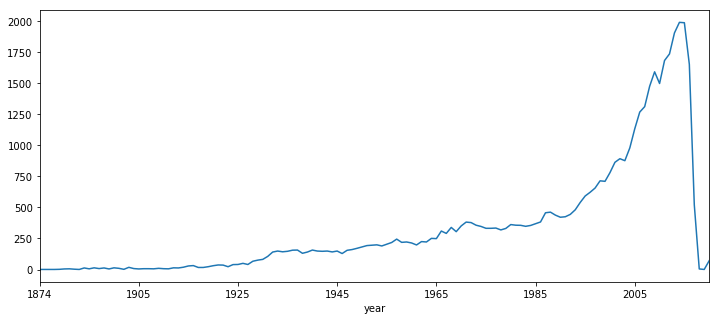

In [209]:
year_count = md_movies.groupby('year')['title'].count()
plt.figure(figsize=(12,5))
year_count.plot()

In [214]:
months = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 
          'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}


In [216]:
temp = md_movies.copy()
temp['year'] = temp[temp['year'] != 'NaT']['year'].astype(int)
temp = temp[temp['year'] >=2000]
hmap = pd.pivot_table(data=temp, index='month', columns='year', aggfunc='count', values='title')
hmap = hmap.fillna(0)

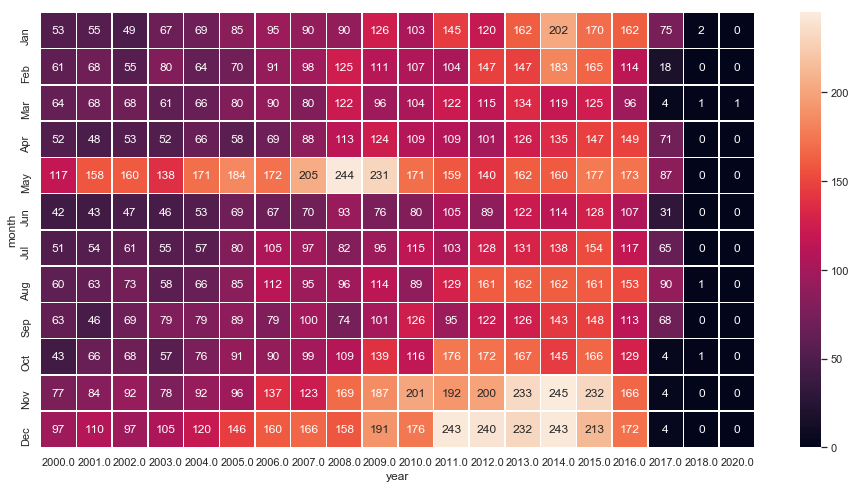

In [218]:
sns.set(font_scale=1)
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(hmap, annot=True, linewidths=.5, ax=ax, fmt='n', yticklabels=month_order)

In [210]:
md_movies.shape

(45484, 21)

We only have 9000 movies out of 46483 (a little less than 20%) of the entire dataset. This is small, but it might give us some key insights into movies. 

In [211]:
qualified = md_movies.sort_values('weighted_rating', ascending=False).head(250)

In [212]:
qualified.head(10)

,title,original_language,belongs_to_collection,release_date,runtime,tagline,budget,revenue,genres,production_countries,...,imdb_id,id,keywords,weighted_rating,poster_path,poster_path,return,year,day,month
10325,Dilwale Dulhania Le Jayenge,hi,NaN,1995-10-20,190.0,Come... Fall In Love,13200000.0,1.000000e+08,"[Comedy, Drama, Romance]",[India],...,tt0112870,19404.0,[musical],8.907024,<img src='http://image.tmdb.org/t/p/w185//2gvb...,<img src='http://image.tmdb.org/t/p/w185//2gvb...,7.575758,1995,NaN,Oct
314,The Shawshank Redemption,en,NaN,1994-09-23,142.0,Fear can hold you prisoner. Hope can set you f...,25000000.0,2.834147e+07,"[Drama, Crime]",[United States of America],...,tt0111161,278.0,"[prison, corruption, police brutality, prison ...",8.486478,<img src='http://image.tmdb.org/t/p/w185//9O7g...,<img src='http://image.tmdb.org/t/p/w185//9O7g...,1.133659,1994,NaN,Sep
835,The Godfather,en,The Godfather Collection,1972-03-14,175.0,An offer you can't refuse.,6000000.0,2.450664e+08,"[Drama, Crime]",[United States of America],...,tt0068646,238.0,"[italy, love at first sight, loss of father, p...",8.481270,<img src='http://image.tmdb.org/t/p/w185//rPdt...,<img src='http://image.tmdb.org/t/p/w185//rPdt...,40.844402,1972,NaN,Mar
41264,Your Name.,ja,NaN,2016-08-26,106.0,NaN,NaN,3.552983e+08,"[Romance, Animation, Drama]",[Japan],...,tt5311514,372058.0,"[supernatural, romance, school, star crossed l...",8.393523,<img src='http://image.tmdb.org/t/p/w185//xq1U...,<img src='http://image.tmdb.org/t/p/w185//xq1U...,NaN,2016,NaN,Aug
12501,The Dark Knight,en,The Dark Knight Collection,2008-07-16,152.0,Why So Serious?,185000000.0,1.004558e+09,"[Drama, Action, Crime, Thriller]","[United Kingdom, United States of America]",...,tt0468569,155.0,"[dc comics, crime fighter, secret identity, sc...",8.291345,<img src='http://image.tmdb.org/t/p/w185//1hRo...,<img src='http://image.tmdb.org/t/p/w185//1hRo...,5.430046,2008,NaN,Jul
2848,Fight Club,en,NaN,1999-10-15,139.0,Mischief. Mayhem. Soap.,63000000.0,1.008538e+08,[Drama],"[Germany, United States of America]",...,tt0137523,550.0,"[support group, dual identity, nihilism, rage ...",8.289036,<img src='http://image.tmdb.org/t/p/w185//adw6...,<img src='http://image.tmdb.org/t/p/w185//adw6...,1.600853,1999,NaN,Oct
292,Pulp Fiction,en,NaN,1994-09-10,154.0,Just because you are a character doesn't mean ...,8000000.0,2.139288e+08,"[Thriller, Crime]",[United States of America],...,tt0110912,680.0,"[transporter, brothel, drug dealer, boxer, mas...",8.287767,<img src='http://image.tmdb.org/t/p/w185//dM2w...,<img src='http://image.tmdb.org/t/p/w185//dM2w...,26.741095,1994,NaN,Sep
522,Schindler's List,en,NaN,1993-11-29,195.0,"Whoever saves one life, saves the world entire.",22000000.0,3.213656e+08,"[Drama, History, War]",[United States of America],...,tt0108052,424.0,"[factory, concentration camp, hero, holocaust,...",8.276184,<img src='http://image.tmdb.org/t/p/w185//yPis...,<img src='http://image.tmdb.org/t/p/w185//yPis...,14.607526,1993,NaN,Nov
23719,Whiplash,en,NaN,2014-10-10,105.0,The road to greatness can take you to the edge.,3300000.0,1.309200e+07,[Drama],[United States of America],...,tt2582802,244786.0,"[jazz, obsession, conservatory, music teacher,...",8.275860,<img src='http://image.tmdb.org/t/p/w185//lIv1...,<img src='http://image.tmdb.org/t/p/w185//lIv1...,3.967273,2014,NaN,Oct
5489,Spirited Away,ja,NaN,2001-07-20,125.0,The tunnel led Chihiro to a mysterious town...,15000000.0,2.749251e+08,"[Fantasy, Adventure, Animation, Family]",[Japan],...,tt0245429,129.0,"[witch, parent child relationship, magic, dark...",8.273400,<img src='http://image.tmdb.org/t/p/w185//ynXo...,<img src='http://image.tmdb.org/t/p/w185//ynXo...,18.328340,2001,NaN,Jul


In [220]:
# Save it

# md_movies.to_csv('movies-dataset-cleaning-complete-jun6.csv')

# Self Scraped Data with OMDBAPI

In [221]:
print("The shape of the raw dataset is: {}".format(sc_data.shape))

The shape of the raw dataset is: (284303, 25)


In [224]:
movies = sc_data

In [225]:
movies.columns

Index(['title', 'year', 'rated', 'released', 'runtime', 'genre', 'director',
       'writer', 'actors', 'plot', 'language', 'country', 'awards', 'poster',
       'ratings', 'metascore', 'imdb_rating', 'imdb_votes', 'imdb_id', 'type',
       'dvd', 'box_office', 'production', 'website', 'response'],
      dtype='object')

In [226]:
movies = movies.drop(['website','response','type','ratings','metascore','dvd','box_office'],axis=1)

# Drop duplicate movies from the dataframe
movies = movies.drop_duplicates(subset='plot', keep= 'first')

# Drop TV shows from the dataframe
ratings = ['TV-14', 'TV-PG', 'TV-MA', 'TV-G', 'TV-Y', 'TV-13', 'TV-Y7']

for rating in ratings:
    movies = movies[movies.rated != rating]
    
    
# Drop a few other misc TV shows that snuck through
titles = ['The Mahabharata', 'Centennial', 'Dominion Tank Police', 'Children of Dune', 'Helen of Troy']

for title in titles:
    movies = movies[movies['title'] != title]
    
movies = movies[movies['rated'] != 'E']

movies.head()

,title,year,rated,released,runtime,genre,director,writer,actors,plot,language,country,awards,poster,imdb_rating,imdb_votes,imdb_id,production
0,Toy Story,1995,G,22-Nov-95,81 min,"Animation, Adventure, Comedy, Family, Fantasy",John Lasseter,"John Lasseter (original story by), Pete Docter...","Tom Hanks, Tim Allen, Don Rickles, Jim Varney",A cowboy doll is profoundly threatened and jea...,English,USA,Nominated for 3 Oscars. Another 23 wins & 17 n...,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,8.3,"788,709",tt0114709,Buena Vista
1,Jumanji,1995,PG,15-Dec-95,104 min,"Adventure, Comedy, Family, Fantasy",Joe Johnston,"Jonathan Hensleigh (screenplay by), Greg Taylo...","Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",When two kids find and play a magical board ga...,"English, French",USA,4 wins & 9 nominations.,https://m.media-amazon.com/images/M/MV5BZTk2Zm...,7.0,"267,973",tt0113497,Sony Pictures Home Entertainment
2,Grumpier Old Men,1995,PG-13,22-Dec-95,101 min,"Comedy, Romance",Howard Deutch,"Mark Steven Johnson (characters), Mark Steven ...","Walter Matthau, Jack Lemmon, Sophia Loren, Ann...",John and Max resolve to save their beloved bai...,"English, Italian, German",USA,2 wins & 2 nominations.,https://m.media-amazon.com/images/M/MV5BMjQxM2...,6.6,"22,329",tt0113228,Warner Home Video
3,Waiting to Exhale,1995,R,22-Dec-95,124 min,"Comedy, Drama, Romance",Forest Whitaker,"Terry McMillan (novel), Terry McMillan (screen...","Whitney Houston, Angela Bassett, Loretta Devin...","Based on Terry McMillan's novel, this film fol...",English,USA,8 wins & 9 nominations.,https://m.media-amazon.com/images/M/MV5BYzcyMD...,5.8,"8,640",tt0114885,Twentieth Century Fox Home Entertainment
4,Father of the Bride Part II,1995,PG,8-Dec-95,106 min,"Comedy, Family, Romance",Charles Shyer,"Albert Hackett (screenplay ""Father's Little Di...","Steve Martin, Diane Keaton, Martin Short, Kimb...",George Banks must deal not only with the pregn...,English,USA,Nominated for 1 Golden Globe. Another 1 win & ...,https://m.media-amazon.com/images/M/MV5BOTEyNz...,6.0,"31,241",tt0113041,Disney


In [227]:
# Removing 'min' from runtime and changing it to a numeric

movies['runtime'] = movies['runtime'].str.strip('min')

# Change to numeric
movies['runtime'] = pd.to_numeric(movies['runtime'], errors='coerce')

print(movies['runtime'].describe())

# Changing imdb votes to numeric
movies['imdb_votes'] = movies['imdb_votes'].str.replace(',','')
movies['imdb_votes'] = pd.to_numeric(movies['imdb_votes'])

count    150101.000000
mean         90.377896
std          27.852285
min           1.000000
25%          79.000000
50%          90.000000
75%         101.000000
max         950.000000
Name: runtime, dtype: float64


### Paring down and data reduction

Having scraped this dataset myself, it required extensive cleaning. Many of the movies will have a title, IMDb id, and nothing else. After weighing my options, I decided to not include movies in the first iteration of this project that did not include plots. Though much of the data exploration included looking at budget and box office figures, these figures were missing for large portions of the data, so ultimately excluded. 

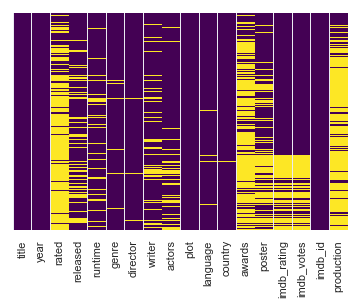

In [228]:
# Checking for missing data

sns.heatmap(movies.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [229]:
# Change year to numeric year

movies['year'] = movies['year'].str.strip('–')
movies['year'] = pd.to_numeric(movies['year'])

In [230]:
# Change 'released' to datetime
movies['released'] = movies['released'].str.strip('–')
movies['released'] = pd.to_datetime(movies['released'],errors='raise')

# For rows where there was no release date, impute year from ['year'] column
movies['released'] = movies.released.combine_first(movies.year)

In [231]:
movies.rated.value_counts()

movies['rated'] = movies['rated'].apply(lambda x: str(x).upper())

#### Ratings

We have quite a few old movies with no ratings, before the MPAA started assigning the rating system they use today. As well, movie ratings have changed over the years. 

Using an if/else loop to assign and clean up ratings allows for single-letter ratings to be changed without the
use of regular expressions. Film ratings have changed considerably over the years and in foreign films may be
known as something else, this streamlines the process into sections: No info, R, Not rated, unrated, PG, G, PG-13, Approved, NC-17, and 'other'

In [232]:
ratings = []

for rating in movies['rated']:
    if rating == 'NAN':
        ratings.append('NO INFO')
    elif rating == 'R': #or '18' or 'M' or 'M/PG':
        ratings.append('R')
    elif rating == '18': #or '18' or 'M' or 'M/PG':
        ratings.append('R')   
    elif rating == 'M': #or '18' or 'M' or 'M/PG':
        ratings.append('R')
    elif rating == 'M/PG': #or '18' or 'M' or 'M/PG':
        ratings.append('R')
    elif rating == 'NOT RATED': #or 'NR':
        ratings.append('NOT RATED')
    elif rating == 'NR': #or 'NR':
        ratings.append('NOT RATED')
    elif rating == 'PG':
        ratings.append('PG')
    elif rating == 'G':# or 'GP' or 'U':
        ratings.append('G')
    elif rating == 'GP':# or 'GP' or 'U':
        ratings.append('G')
    elif rating == 'U':# or 'GP' or 'U':
        ratings.append('G')
    elif rating == 'PG-13':
        ratings.append('PG-13')
    elif rating == 'APPROVED':# or 'PASSED':
        ratings.append('APPROVED')
    elif rating == 'PASSED':# or 'PASSED':
        ratings.append('APPROVED')
    elif rating == 'UNRATED':
        ratings.append('UNRATED')
    elif rating == 'NC-17':# or 'X':
        ratings.append('NC-17')
    elif rating == 'X':# or 'X':
        ratings.append('NC-17')
    else:
        ratings.append('OTHER')

In [233]:
movies['rated'] = ratings

In [234]:
movies = movies[movies['rated'] != 'OTHER']

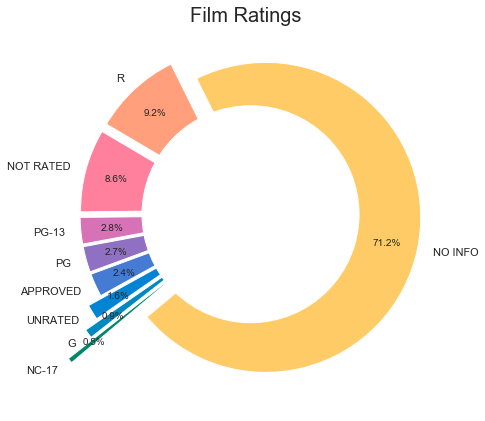

In [235]:
# pie chart of ratings
c_scheme = ['#FFCB66', '#FF9F7C', '#FF809C', '#D872B7', '#9070C2', '#467BD3', '#0084D3', '#0089C0', '#00866B']
labels = movies['rated'].value_counts().index[:9]
#labels = ['No Info', 'R','Not Rated','Approved','PG-13','PG','Unrated','G','NC-17']
explode = (.1, .1, .1, .1, .1, .1, .2, .3, .5)

sizes = movies.rated.value_counts()[:9]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=220, pctdistance=0.80, shadow=False, colors=c_scheme)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
#plt.tight_layout()
plt.title('Film Ratings', fontsize=20)
plt.show()

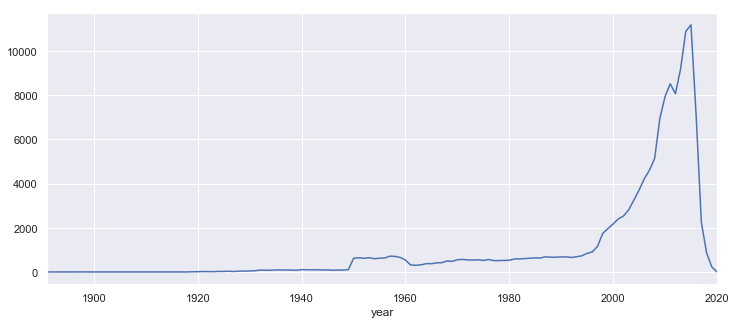

In [236]:
year_count = movies.groupby('year')['title'].count()
plt.figure(figsize=(12,5))
year_count.plot()

In [237]:
runtimes = movies[movies['runtime'] < 600]
runtimes = movies[movies['rated'] != 'NO INFO']
runtimes = runtimes[runtimes['rated'] != 'NOT RATED']

A feature film (or just “feature”) is a full-length film, the kind you buy a ticket for at your local theater. The term is also used to distinguish between films that are first shown theatrically versus those made for television.

A modern feature is typically between 80 and 180 minutes long, but different groups have different minimum lengths to be considered a feature. The Screen Actors Guild definition sets the minimum length at 80 minutes, while AFI and BFI’s definitions call any film longer than 40 minutes a feature. The Academy also uses the 40 minute benchmark to determine if a film is a feature or a short. The Sundance Film Festival sets the line at 50 minutes.

For my purposes, I'm going to create features for films based on the length of the film, in the following categories:

1. Less than 40 minutes: 'Short'
2. Less than 80 minutes: 'Below minimum'
3. Between 80 and 180 minutes: 'Feature-length'
4. Above 180 minutes but below 300: 'Long'
5. Above 300 minutes: 'Very long or miniseries (VLMS)'

In [238]:
runtimes = []

for runtime in movies['runtime']:
    if runtime < 40:
        runtimes.append('Short')
    elif runtime < 80:
        runtimes.append('Below minimum')
    elif runtime < 180:
        runtimes.append('Feature-length')
    elif runtime < 300:
        runtimes.append('Long')
    elif runtime >= 300:
        runtimes.append('VLMS')
    else:
        runtimes.append('No Info')
        
movies['feature_length'] = runtimes

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

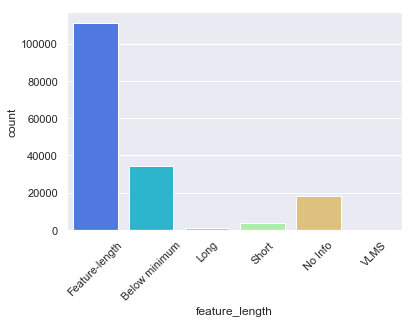

In [239]:
sns.countplot(movies['feature_length'], palette='rainbow')
plt.xticks(rotation=45)

Text(0.5, 0, 'Runtime in Minutes')

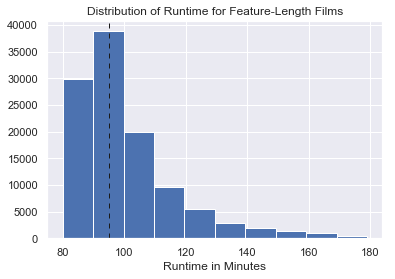

In [240]:
feature_length = movies[movies['feature_length'] == 'Feature-length']

plt.hist(feature_length['runtime'])
plt.axvline((feature_length['runtime'].median()), color='k', dashes=[5,5] , linewidth=1) #Create reference line
plt.title('Distribution of Runtime for Feature-Length Films')
plt.xlabel('Runtime in Minutes')


Text(0.5, 1.0, 'Distribution of Movies by Year')

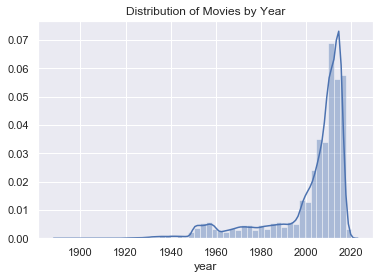

In [241]:
sns.distplot(movies['year'].dropna())
plt.title('Distribution of Movies by Year')

Text(0, 0.5, 'Votes')

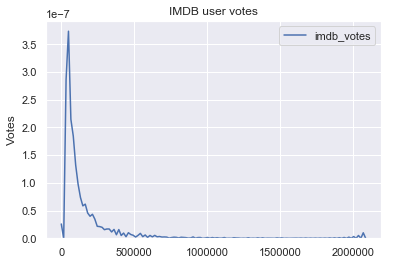

In [243]:
sns.kdeplot(movies['imdb_votes'])
plt.title('IMDB user votes')
plt.ylabel('Votes')

Text(0.5, 1.0, 'Distribution of IMDB Ratings - Unweighted')

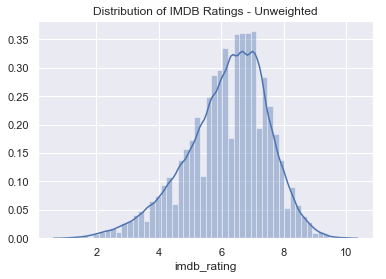

In [244]:
sns.distplot(movies['imdb_rating'].dropna())
plt.title('Distribution of IMDB Ratings - Unweighted')

#### Add form of weighted average (IMDB)

* modified the original formula as we don't care if a movie has 0 ratings, add some noise/lambda 0

Weighted rating using IMDb's equation for a true Bayesian estimate: 

$$ (WR) = (vv+m.R) + (mv+m.C)(vv+m.R)+(mv+m.C) $$ 

where:

v = the number of votes for the movie  
m = the minimum votes required to be listed in the database  
R = the average rating of the movie  
C = the mean vote across the whole report  

In [246]:
vote_counts = movies[movies['imdb_votes'].notnull()]['imdb_votes'].astype('int')
vote_averages = movies[movies['imdb_rating'].notnull()]['imdb_rating'].astype('int')
C = vote_averages.mean()

m = vote_counts.quantile(0.75)

def weighted_rating(x):
    v = x['imdb_votes']+1 # added +1 - Dan
    R = x['imdb_rating']
    return (v/(v+m) * R) + (m/(m+v) * C)

movies['weighted_rating'] = movies.apply(weighted_rating, axis=1)

Text(0.5, 1.0, 'Distribution of IMDB Ratings')

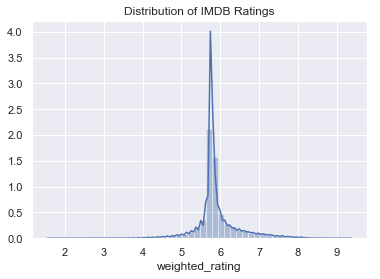

In [247]:
sns.distplot(movies['weighted_rating'].dropna())
plt.title('Distribution of IMDB Ratings')

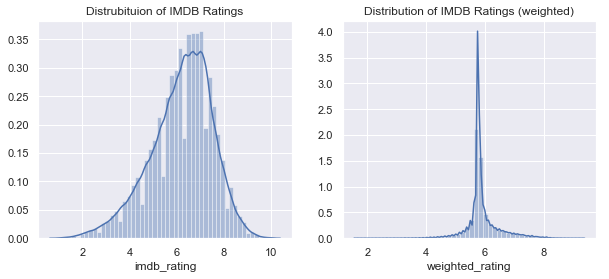

In [252]:
fig, axis = plt.subplots(1, 2, figsize=(10,4))
axis[0].set_title('Distrubituion of IMDB Ratings')
axis[1].set_title('Distribution of IMDB Ratings (weighted)')
ax = sns.distplot(movies['imdb_rating'].dropna(), ax=axis[0])

ax = sns.distplot(movies['weighted_rating'].dropna(),ax=axis[1])
    

### Country Information

Country information looks a bit all over the place. Some movies have only one country listed while others have upwards of 10. I could one-hot-encode and see what that looks like or I could split and see what I can do with stuff.

According to [IMDB](https://help.imdb.com/article/contribution/titles/countries/GTSW4DN8H8LKCXER?ref_=helpms_helpart_inline#):

IMDb defines the country of a title as the place or places where the production companies for that title are based, and therefore where the financing originated. This means, for example, even if a title is shot on location in France, if its production companies are all based in the USA, we record the country as USA.
If a title is a multi-country production, the order the countries are entered into the addition/update forms is significant and will be reflected in the display order within IMDb.
When entering country information for older titles from countries whose borders have changed over time, please select the name of the country as it was known when the title was produced. For example a title made on the western side of Germany in 1980 should be entered as West Germany whereas one produced in the same location after the re-unification of Germany should be entered simply as Germany.
To update data for categories that aren't listed above, select Choose from all sections checkbox and supply a Country correction to inform us of the new country and the title(s) to which it applies.

So in this case if there is more than one country listed, the first item in the list should be the 'majority' country, so I will use that.

In [253]:
# Turn everything into a string and strip extra whitespace, make all letters capital for uniformity
movies['country'] = movies['country'].apply(lambda x: str(x).upper())
movies['country'] = movies['country'].str.strip()

# Send information to list and take the first item of each list, the 'majority' country
countries = movies['country'].str.split(',').tolist()
country_list = list(zip(*countries))[0]

# Send back to dataframe
movies['country'] = country_list

In [254]:
not_usa = movies[movies['country'] != 'USA']
values = not_usa['country'].value_counts(ascending=False)[:10]

Text(0, 0.5, 'Movie Count')

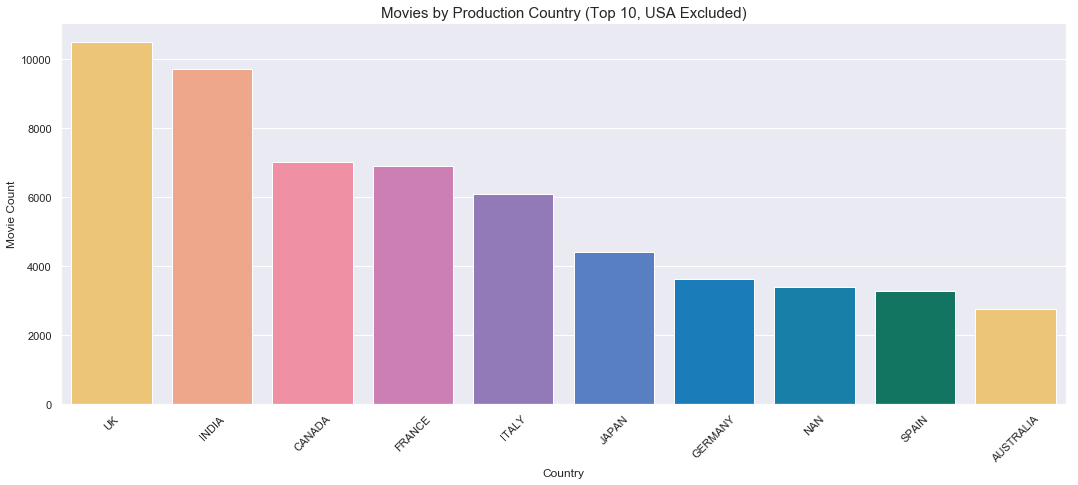

In [255]:
fig, ax = plt.subplots(figsize=(18,7))
ax = sns.barplot(x=values.index, y=values, palette=c_scheme)
plt.xticks(rotation=45)
plt.title('Movies by Production Country (Top 10, USA Excluded)', size=15)
plt.xlabel('Country')
plt.ylabel('Movie Count')

Text(0, 0.5, 'Movie Count')

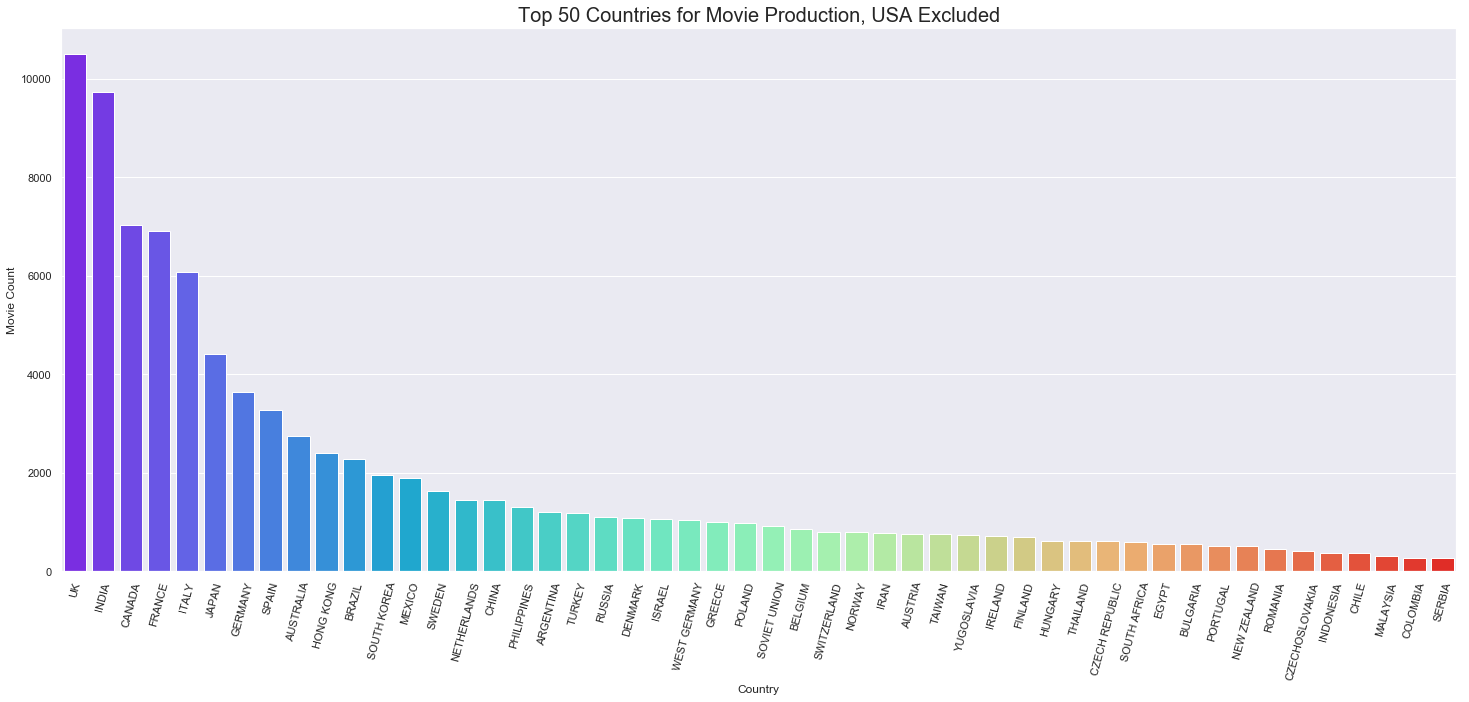

In [256]:
not_usa = not_usa[not_usa['country'] != 'NAN']

values = not_usa['country'].value_counts(ascending=False)[:50]

fig, ax = plt.subplots(figsize=(25,10))
ax = sns.barplot(x=values.index, y=values, palette='rainbow')
plt.xticks(rotation=75)
plt.title('Top 50 Countries for Movie Production, USA Excluded', size=20)
plt.xlabel('Country')
plt.ylabel('Movie Count')

#### Writers

Writers and actors will be handled similarly: I'm going to stick their names together so that we don't get two directors whose first or last names are different. John Lasseter is the only John, and I dont want two people with simiar names getting grouped together. I'll do the same for actors.

In [257]:
writers = movies[movies['writer'] != 'nan']

writers.shape

(168192, 20)

In [258]:
# Take out information between ()s
# Why is this taking information out from after ()s?
movies['writer'] = movies['writer'].str.replace(r"\(.*\)","")

# Clean so that writers are one word for later NLP
movies['writer'] = movies['writer'].apply(lambda x: str(x).replace(" ",""))
movies['writer'] = movies['writer'].apply(lambda x: str(x).replace (",", " "))

movies['writer'] = movies['writer'].apply(lambda x: str(x))

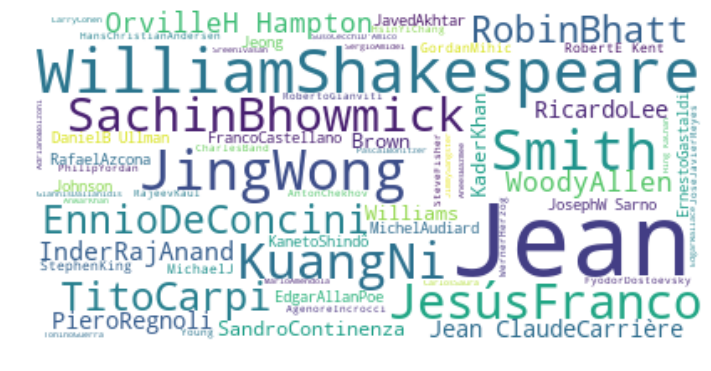

In [261]:
writers = movies[movies['writer'] != 'nan']

text = ''.join((writer+' ') for writer in writers['writer'])

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

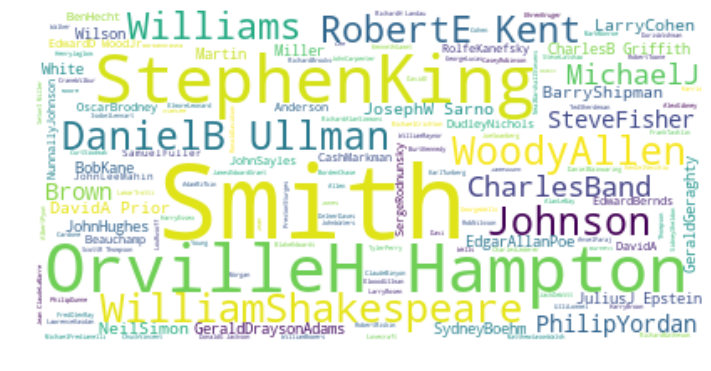

In [262]:
# What about USA directors only?

usa = movies[movies['country'] == 'USA']
usa = usa[usa['writer'] != 'nan']


text = ''.join((writer+' ') for writer in usa['writer'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [263]:
movies['director'] = movies['director'].apply(lambda x: str(x))
movies['director'] = movies['director'].apply(lambda x: str(x).lower())
movies['director'] = movies['director'].apply(lambda x: str(x).replace(" ",""))
movies['director'] = movies['director'].apply(lambda x: str(x).split(","))
movies['director'] = movies['director'].apply(lambda x: str(x).replace(".",""))

In [264]:
movies['writer'] = movies['writer'].apply(lambda x: str(x))
movies['writer'] = movies['writer'].apply(lambda x: str(x).lower())
movies['writer'] = movies['writer'].apply(lambda x: str(x).replace(" ",","))
movies['writer'] = movies['writer'].apply(lambda x: str(x).split(","))
movies['writer'] = movies['writer'].apply(lambda x: str(x).replace(".",""))

In [265]:
movies['actors'] = movies['actors'].str.replace(r"\(.*\)","")

# Clean so that writers are one word for later NLP
movies['actors'] = movies['actors'].apply(lambda x: str(x).replace(" ",""))
movies['actors'] = movies['actors'].apply(lambda x: str(x).replace (",", " "))

movies['actors'] = movies['actors'].apply(lambda x: str(x))

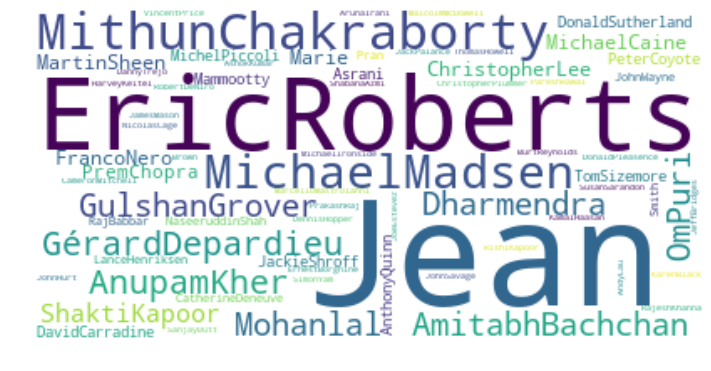

In [266]:
actors = movies[movies['actors'] != 'nan']

text = ''.join((actor+' ') for actor in actors['actors'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

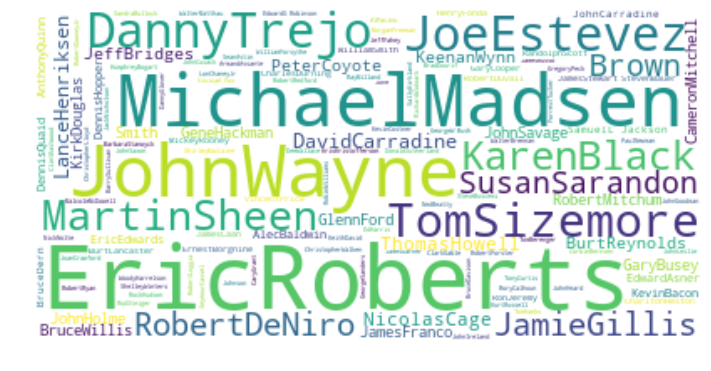

In [267]:
usa_actors = actors[actors['country'] == 'USA']

text = ''.join((actor+' ') for actor in usa_actors['actors'].dropna())

# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(12,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [268]:
movies['actors'] = movies['actors'].apply(lambda x: str(x).lower())
movies['actors'] = movies['actors'].apply(lambda x: str(x).replace(" ",","))
movies['actors'] = movies['actors'].apply(lambda x: str(x).split(","))
movies['actors'] = movies['actors'].apply(lambda x: str(x).replace(".",""))
movies['actors'][:5]

0    ['tomhanks', 'timallen', 'donrickles', 'jimvar...
1    ['robinwilliams', 'jonathanhyde', 'kirstenduns...
2    ['waltermatthau', 'jacklemmon', 'sophialoren',...
3    ['whitneyhouston', 'angelabassett', 'lorettade...
4    ['stevemartin', 'dianekeaton', 'martinshort', ...
Name: actors, dtype: object

#### Languages

If a movie was released in mutliple languages, then its original language is listed first, followed by any translation. So similar to country, we'll take only the first language.

In [270]:
# Turn everything into a string and strip extra whitespace, make all letters capital for uniformity
movies['language'] = movies['language'].apply(lambda x: str(x))
movies['language'] = movies['language'].str.strip()

# Send information to list and take the first item of each list, the 'majority' country
languages = movies['language'].str.split(',').tolist()
language_list = list(zip(*languages))[0]

# Send back to dataframe
movies['language'] = language_list

Text(0, 0.5, 'Count')

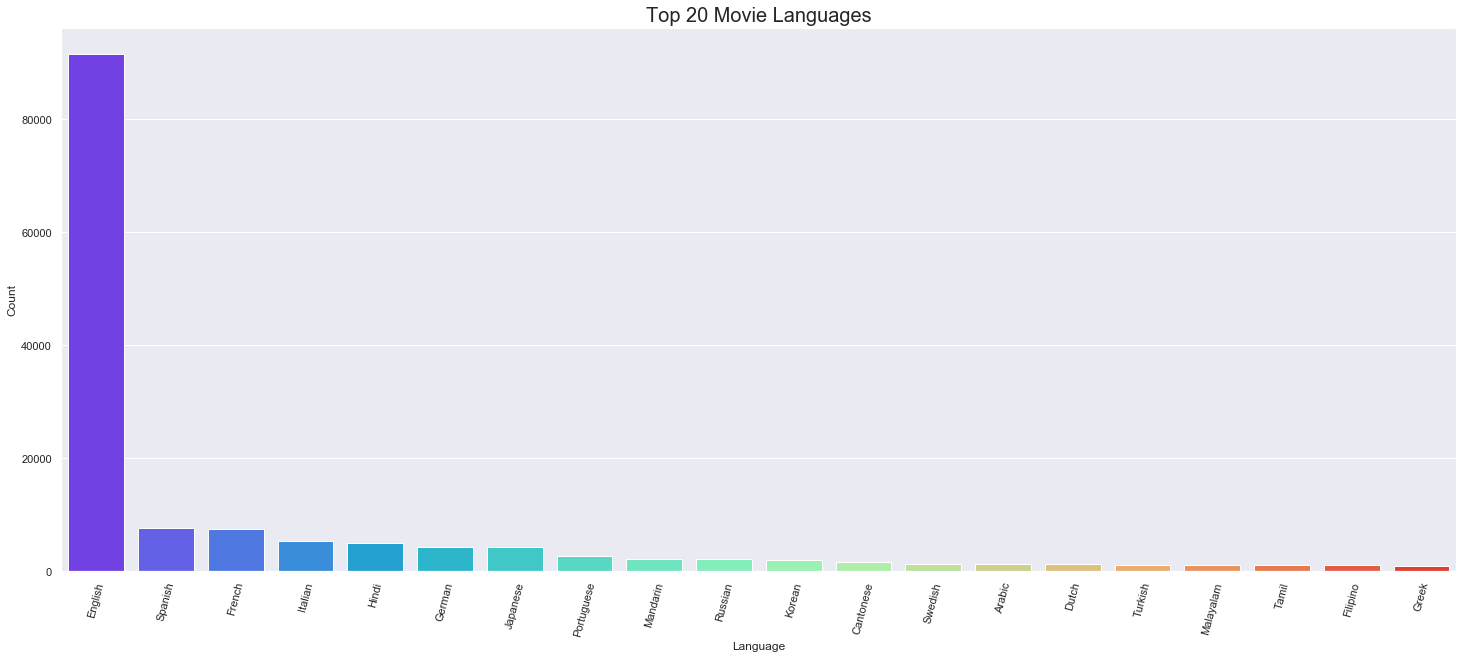

In [271]:
nonan = movies[movies['language'] != 'nan']

top_languages = nonan['language'].value_counts(ascending=False)[:20]

fig, ax = plt.subplots(figsize=(25,10))
ax = sns.barplot(x=top_languages.index, y=top_languages, palette='rainbow')
plt.xticks(rotation=75)
plt.title('Top 20 Movie Languages', size=20)
plt.xlabel('Language')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

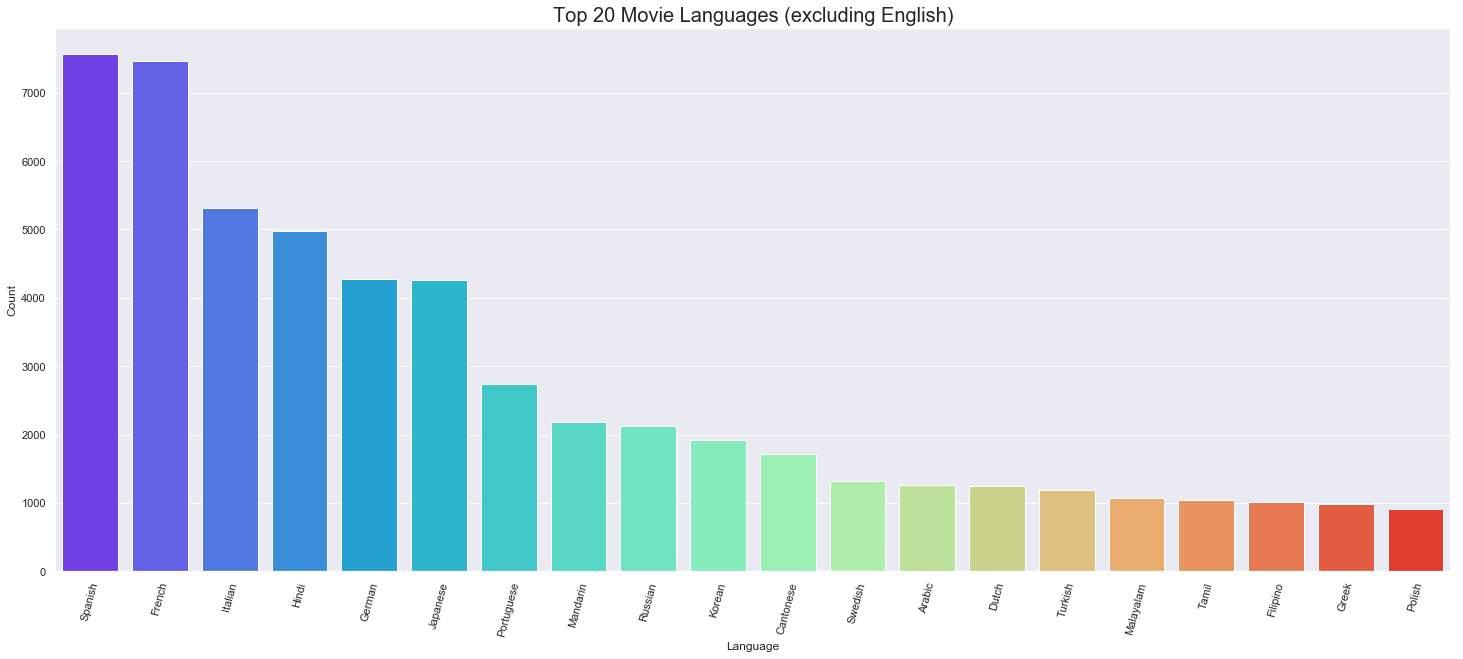

In [272]:
not_english = movies[movies['language'] != 'English']
not_english = not_english[not_english['language'] != 'nan']

top_languages = not_english['language'].value_counts(ascending=False)[:20]

fig, ax = plt.subplots(figsize=(25,10))
ax = sns.barplot(x=top_languages.index, y=top_languages, palette='rainbow')
plt.xticks(rotation=75)
plt.title('Top 20 Movie Languages (excluding English)', size=20)
plt.xlabel('Language')
plt.ylabel('Count')

# NLP and Prepping for Content Filtering

In [273]:
movies = movies[['title','writer','genre','director','actors','plot','language']]
movies.head()

,title,writer,genre,director,actors,plot,language
0,Toy Story,['johnlasseter'],"Animation, Adventure, Comedy, Family, Fantasy",['johnlasseter'],"['tomhanks', 'timallen', 'donrickles', 'jimvar...",A cowboy doll is profoundly threatened and jea...,English
1,Jumanji,['jonathanhensleigh'],"Adventure, Comedy, Family, Fantasy",['joejohnston'],"['robinwilliams', 'jonathanhyde', 'kirstenduns...",When two kids find and play a magical board ga...,English
2,Grumpier Old Men,"['markstevenjohnson', 'markstevenjohnson']","Comedy, Romance",['howarddeutch'],"['waltermatthau', 'jacklemmon', 'sophialoren',...",John and Max resolve to save their beloved bai...,English
3,Waiting to Exhale,['terrymcmillan'],"Comedy, Drama, Romance",['forestwhitaker'],"['whitneyhouston', 'angelabassett', 'lorettade...","Based on Terry McMillan's novel, this film fol...",English
4,Father of the Bride Part II,['alberthackett'],"Comedy, Family, Romance",['charlesshyer'],"['stevemartin', 'dianekeaton', 'martinshort', ...",George Banks must deal not only with the pregn...,English


In [274]:
for column in movies:
    movies[column] = movies[column].apply(lambda x: str(x))


In [278]:
# initializing the new column
movies['Key_words'] = ""

for index, row in movies.iterrows():
    plot = row['plot']
    
    # instantiating Rake, by default is uses english stopwords from NLTK
    # and discard all puntuation characters
    r = Rake()

    # extracting the words by passing the text
    r.extract_keywords_from_text(plot)

    # getting the dictionary whith key words and their scores
    key_words_dict_scores = r.get_word_degrees()
    
    # assigning the key words to the new column
    row['Key_words'] = list(key_words_dict_scores.keys())

In [280]:
movies.drop(columns = ['plot'], inplace = True)

In [281]:
movies.set_index('title', inplace = True)
movies.head()

,writer,genre,director,actors,language,Key_words
title,,,,,,
Toy Story,['johnlasseter'],"Animation, Adventure, Comedy, Family, Fantasy",['johnlasseter'],"['tomhanks', 'timallen', 'donrickles', 'jimvar...",English,"[new, spaceman, figure, supplants, jealous, to..."
Jumanji,['jonathanhensleigh'],"Adventure, Comedy, Family, Fantasy",['joejohnston'],"['robinwilliams', 'jonathanhyde', 'kirstenduns...",English,"[finishing, decades, man, trapped, play, magic..."
Grumpier Old Men,"['markstevenjohnson', 'markstevenjohnson']","Comedy, Romance",['howarddeutch'],"['waltermatthau', 'jacklemmon', 'sophialoren',...",English,"[attention, turning, new, female, owner, catch..."
Waiting to Exhale,['terrymcmillan'],"Comedy, Drama, Romance",['forestwhitaker'],"['whitneyhouston', 'angelabassett', 'lorettade...",English,"[film, follows, four, relationships, based, am..."
Father of the Bride Part II,['alberthackett'],"Comedy, Family, Romance",['charlesshyer'],"['stevemartin', 'dianekeaton', 'martinshort', ...",English,"[george, banks, must, deal, also, daughter, wi..."
